In [6]:
import os

def rename_files_in_dir(dir_path, new_prefix):
    for count, filename in enumerate(os.listdir(dir_path)):
        # construct new filename with prefix and count
        new_filename = f"{new_prefix}_{count + 1}.jpg"
        # construct full file paths
        src = os.path.join(dir_path, filename)
        dst = os.path.join(dir_path, new_filename)
        # rename file
        os.rename(src, dst)

dir_path = "./FMD_KAGGLE/FMD_DATASET/incorrect_mask/mc"
new_prefix = "mc"  # Replace with your desired prefix
rename_files_in_dir(dir_path, new_prefix)


FileExistsError: [WinError 183] Nie można utworzyć pliku, który już istnieje: './FMD_KAGGLE/FMD_DATASET/incorrect_mask/mc\\mc_10.jpg' -> './FMD_KAGGLE/FMD_DATASET/incorrect_mask/mc\\mc_2.jpg'

In [12]:
import tensorflow as tf

# Set some parameters
img_height, img_width = 150, 150  # dimensions to which the images will be resized
batch_size = 32

# Create an ImageDataGenerator object
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Use the flow_from_directory method to load images from the disk, apply rescaling, and resize the images
train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical') # use 'binary' if you have only two classes

validation_generator = validation_datagen.flow_from_directory(
    'dataset/validation',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical') # use 'binary' if you have only two classes


FileNotFoundError: [WinError 3] System nie może odnaleźć określonej ścieżki: 'dataset/train'

In [2]:
import tensorflow as tf

# Set some parameters
img_height, img_width = 150, 150  # dimensions to which the images will be resized
batch_size = 32

# Create an ImageDataGenerator object
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Use the flow_from_directory method to load images from the disk, apply rescaling, and resize the images
train_generator = train_datagen.flow_from_directory(
    'dataset',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical') # use 'binary' if you have only two classes

In [3]:
train_generator.class_indices

In [9]:
import pandas as pd
print(pd.__version__)

2.0.1


In [17]:
import os
import pandas as pd

# define the directory where your datasets are stored
root_dir = 'dataset'

# define the types of obstructions
obstruction_types = ['mask', 'sunglasses', 'hand', 'none']

# create a dataframe to store the image paths and labels
df = pd.DataFrame(columns=['image_path'] + obstruction_types)

# populate the dataframe with the image paths and labels
for obstruction in obstruction_types:
    # get a list of all images in this directory
    image_files = os.listdir(os.path.join(root_dir, obstruction))
    
    for image_file in image_files:
        # create a new row for this image
        row = {obstruction_type: 0 for obstruction_type in obstruction_types}
        row['image_path'] = os.path.join(root_dir, obstruction, image_file)
        row[obstruction] = 1  # this image has the current obstruction
        
        # append this row to the dataframe
        df = df.loc(row, ignore_index=True)

# write the dataframe to a CSV file
df.to_csv('image_labels.csv', index=False)

TypeError: unhashable type: 'dict'

In [3]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def multilabel_data_generator(csv_file, batch_size, img_height, img_width):
    df = pd.read_csv(csv_file)
    while True:
        # select batch_size number of samples without replacement
        batch_samples = df.sample(n=batch_size)
        batch_output = []
        batch_input = []
        
        for index in batch_samples.index:
            # get the image path
            img_path = batch_samples.loc[index, 'image_path']
            # read the image and resize it
            img = img_to_array(load_img(img_path, target_size=(img_height, img_width)))
            # normalize the image pixels
            img /= 255.
            batch_input.append(img)
            
            # get the labels for this image
            labels = batch_samples.loc[index, ['mask', 'sunglasses', 'hand', 'none']]
            batch_output.append(labels)
        
        yield (np.array(batch_input), np.array(batch_output))


In [ ]:
train_gen = multilabel_data_generator('train_labels.csv', batch_size, img_height, img_width)

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='sigmoid')  # Output layer with 4 neurons, one for each class
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])


In [ ]:
val_gen = multilabel_data_generator('val_labels.csv', batch_size, img_height, img_width)
test_gen = multilabel_data_generator('test_labels.csv', batch_size, img_height, img_width)


In [ ]:
model.fit(
    train_gen,
    steps_per_epoch=len(train_df) // batch_size,
    epochs=epochs,
    validation_data=val_gen,
    validation_steps=len(val_df) // batch_size
)


In [ ]:
train_df = pd.read_csv('train_labels.csv')
val_df = pd.read_csv('val_labels.csv')
test_df = pd.read_csv('test_labels.csv')


In [ ]:
test_loss, test_acc = model.evaluate(test_gen, steps=len(test_df) // batch_size)

# Real Part now




In [66]:
import os

def rename_files_in_dir(dir_path, new_prefix):
    for count, filename in enumerate(os.listdir(dir_path)):
        # construct new filename with prefix and count
        new_filename = f"{new_prefix}_{count + 1}.jpg"
        # construct full file paths
        src = os.path.join(dir_path, filename)
        dst = os.path.join(dir_path, new_filename)
        # rename file
        os.rename(src, dst)

dir_path = "./FMD_KAGGLE/FMD_DATASET/incorrect_mask/mc"
new_prefix = "mc"  # Replace with your desired prefix
rename_files_in_dir(dir_path, new_prefix)

FileExistsError: [WinError 183] Nie można utworzyć pliku, który już istnieje: './FMD_KAGGLE/FMD_DATASET/incorrect_mask/mc\\mc_10.jpg' -> './FMD_KAGGLE/FMD_DATASET/incorrect_mask/mc\\mc_2.jpg'

In [80]:
#Renaming all the files
import os

root_dir = './dataset/Pgu-Face_Part1'  # replace with the path to your root directory
n=0
# loop through the subdirectories
for subdir in os.listdir(root_dir):
    subdir_path = os.path.join(root_dir, subdir)
    
    # check if the path is a directory
    if os.path.isdir(subdir_path):
        # loop through the image files in this directory
        for old_filename in os.listdir(subdir_path):
            # make sure the file is an image (check any specific image formats you need)
            n+=1
            if old_filename.endswith('.jpg') or old_filename.endswith('.png'):
                # create the new filename
                new_filename = f"{subdir}_{n}x.jpg"
                
                # rename the file
                os.rename(os.path.join(subdir_path, old_filename), os.path.join(subdir_path, new_filename))

print("Renaming complete.")

Renaming complete.


In [81]:
#Moving all the files from the subfolders to the main one
import os
import shutil

root_dir = './dataset/Pgu-Face_Part1'  # replace with the path to your root directory

# loop through the subdirectories
for subdir in os.listdir(root_dir):
    subdir_path = os.path.join(root_dir, subdir)
    
    # check if the path is a directory
    if os.path.isdir(subdir_path):
        # loop through the image files in this directory
        for filename in os.listdir(subdir_path):
            # make sure the file is an image (check any specific image formats you need)
            if filename.endswith('kopia.jpg') or filename.endswith('.png'):
                # construct full file path
                source = os.path.join(subdir_path, filename)
                destination = './dataset/Pgu-Face_Part1'
                # move the file
                shutil.move(source, destination)

print("Images moved successfully.")

Images moved successfully.


In [ ]:
num_skipped = 0
for root, dirs, files in os.walk("../data/wikicommons"):
  path = root.split(os.sep)

  for file in files:
    _, extension = os.path.splitext(file)

    if extension == ".jpg":
      filepath = root + "/" + file

      try:
        fobj = open(filepath, "rb")
        is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
      finally:
        fobj.close()

      if not is_jfif:
        num_skipped += 1
        # Delete corrupted image
        os.remove(filepath)

print("Deleted %d images" % num_skipped)

In [4]:
import cv2
from matplotlib import pyplot as plt
import os
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np

images_path = "./dataset"
training_dataset = keras.preprocessing.image_dataset_from_directory(
  images_path,
  labels='inferred',
  label_mode='categorical',
  color_mode="rgb",
  batch_size=32,
  image_size=(300, 300),
  subset="training",
  validation_split=0.1,
  seed=1
)

test_dataset = keras.preprocessing.image_dataset_from_directory(
  images_path,
  labels='inferred',
  label_mode='categorical',
  color_mode="rgb",
  batch_size=32,
  image_size=(300, 300),
  subset="validation",
  validation_split=0.1,
  seed=1
)


Found 24751 files belonging to 6 classes.
Using 22276 files for training.
Found 24751 files belonging to 6 classes.
Using 2475 files for validation.


In [30]:
# Get the class names
class_names = training_dataset.class_names

# Get the number of classes
num_classes = len(class_names)

# Create a dictionary of class indices
class_indices = {class_name: index for index, class_name in enumerate(class_names)}

# Display the class indices and numbers
for class_name, class_index in class_indices.items():
    print(f"Class: {class_name}, Index: {class_index}")

print(f"Number of Classes: {num_classes}")


Class: glasses, Index: 0
Class: hand, Index: 1
Class: mask, Index: 2
Class: none, Index: 3
Class: other, Index: 4
Class: sunglasses, Index: 5
Number of Classes: 6


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential([
  Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)),
  MaxPooling2D(pool_size=(2, 2)),
  
  Conv2D(64, (3, 3), activation='relu'),
  MaxPooling2D(pool_size=(2, 2)),
  
  Conv2D(128, (3, 3), activation='relu'),
  MaxPooling2D(pool_size=(2, 2)),
  
  Flatten(),
  Dense(512, activation='relu'),
  Dropout(0.3),
  
  Dense(6, activation='softmax'),  # final layer has 6 neurons (one for each category) with softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(
  training_dataset,
  validation_data=test_dataset,
  epochs=5,  # you may want to adjust this
)
history

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 149, 149, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 35, 35, 128)     

In [7]:
# Save the model
model.save('model.h5')


In [8]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('model.h5')


In [70]:
import numpy as np
from keras.preprocessing import image

# Load the image
img_path = '184.png'
img = keras.preprocessing.image.load_img(img_path, target_size=(300, 300))

# Preprocess the image
input_arr = keras.preprocessing.image.img_to_array(img)
input_arr = np.array([input_arr])

# Make the prediction
predictions = model.predict(input_arr)

# Decode the prediction
class_names = ['glasses', 'hand', 'mask', 'none', 'other', 'sunglasses']  # order of labels may vary based on your dataset, ensure the correct order
predicted_class = class_names[np.argmax(predictions)]
print("The model predicts this image is a:", predicted_class)


AttributeError: module 'keras.preprocessing.image' has no attribute 'load_img'

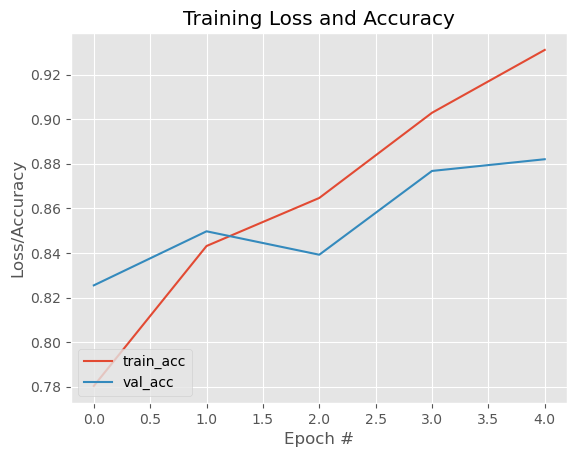

In [40]:
# plot the training loss and accuracy
N = 5
plt.style.use("ggplot")
plt.figure()
#plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
#plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig('evaluation.png')

# VGG16



In [22]:
import cv2
from matplotlib import pyplot as plt
import os
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

In [23]:
# Define the directory to save the models
save_dir = "./saved_models"
os.makedirs(save_dir, exist_ok=True)
images_path = "./dataset_2"

# Define the filename template for saving the models
checkpoint_template = os.path.join(save_dir, "model_epoch{epoch:02d}.h5")

# Create a ModelCheckpoint callback to save the model
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_template, save_freq="epoch")


training_dataset = keras.preprocessing.image_dataset_from_directory(
    images_path,
    labels='inferred',
    label_mode='categorical',
    color_mode="rgb",
    batch_size=32,
    image_size=(150, 150),
    subset="training",
    validation_split=0.2,
    seed=1
)

test_dataset = keras.preprocessing.image_dataset_from_directory(
    images_path,
    labels='inferred',
    label_mode='categorical',
    color_mode="rgb",
    batch_size=32,
    image_size=(150, 150),
    subset="validation",
    validation_split=0.2,
    seed=1
)

# Load the pre-trained VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the weights of the pre-trained layers
base_model.trainable = False

# Create the model
model2 = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(6, activation='softmax')
])

# Compile the model
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model2.summary()

epochs_num = 10

# Train the model
history2 = model2.fit(
    training_dataset,
    validation_data=test_dataset,
    epochs=epochs_num,
    callbacks=[checkpoint_callback]
)


Found 19166 files belonging to 6 classes.
Using 15333 files for training.
Found 19166 files belonging to 6 classes.
Using 3833 files for validation.
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_7 (Flatten)         (None, 8192)              0         
                                                                 
 dense_14 (Dense)            (None, 512)               4194816   
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_15 (Dense)            (None, 6)                 3078      
                                                                 
Total params: 18,912,582
Trainable pa

In [25]:
# Save the model
model2.save('model_VGG16.h5')

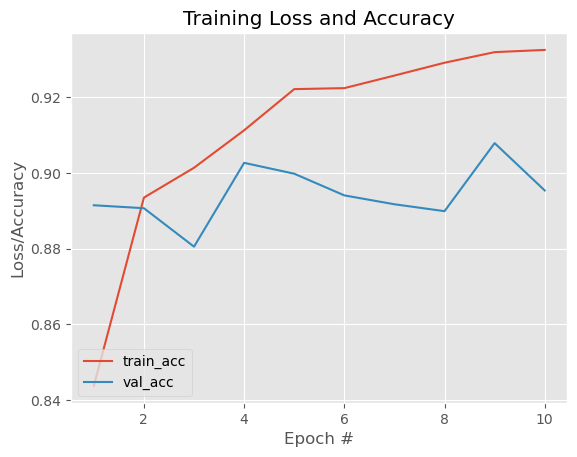

In [26]:
# plot the training loss and accuracy
N = epochs_num+1
plt.style.use("ggplot")
plt.figure()
#plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
#plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(1, N), history2.history["accuracy"], label="train_acc")
plt.plot(np.arange(1, N), history2.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig('evaluation2.png')

In [6]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('model_VGG16.h5')

# Multi-Label

In [2]:
import cv2
from matplotlib import pyplot as plt
import os
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import csv
import os

In [29]:
import os
import shutil

dataset_directory = "./dataset_2"
# Keep track of the unique filenames within each folder
filename_counter = 1
# Loop through the image folders
for folder_name in os.listdir(dataset_directory):
    folder_path = os.path.join(dataset_directory, folder_name)
    if os.path.isdir(folder_path):


        # Loop through the image files in the folder
        for filename in os.listdir(folder_path):
            if filename.lower().endswith((".jpg", ".jpeg", ".png")):
                # Get the file extension
                file_extension = os.path.splitext(filename)[1]

                # Generate a unique filename
                new_filename = f"i{filename_counter:05d}{file_extension}"
                filename_counter += 1

                # Rename the file to the new unique filename
                src_path = os.path.join(folder_path, filename)
                dst_path = os.path.join(folder_path, new_filename)
                os.rename(src_path, dst_path)


In [68]:
import csv
import os

# Define the directory path where the images are located
dataset_directory = "./dataset_2"

# Define the column names for the CSV file
column_names = ["id", "glasses", "hand", "mask", "none", "other", "sunglasses"]

# Create a list to store the rows of the CSV file
csv_rows = []

# Loop through the image folders
for folder_name in column_names[1:]:
    folder_path = os.path.join(dataset_directory, folder_name)
    if os.path.isdir(folder_path):
        # Get the image filenames in the folder
        image_filenames = os.listdir(folder_path)
        # Assign 1 to the corresponding column for each image in the folder
        for image_filename in image_filenames:
            if image_filename.lower().endswith((".jpg", ".jpeg", ".png")):
                # Include the extension in the image ID
                image_id = image_filename  # changed this line
                # Create a new row for the CSV file
                csv_row = [image_id] + [1 if col == folder_name else 0 for col in column_names[1:]]
                # Append the row to the list
                csv_rows.append(csv_row)

# Write the CSV file
csv_file_path = "./dataset.csv"
with open(csv_file_path, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    # Write the column names as the header
    writer.writerow(column_names)
    # Write the rows
    writer.writerows(csv_rows)



In [59]:
train = pd.read_csv('dataset_5_smaller.csv')    # reading the csv file
train.head()      # printing first five rows of the file

,id,glasses,hand,mask,none,other,sunglasses
0,i00001.jpg,1,0,0,0,0,0
1,i00002.jpg,1,0,0,0,0,0
2,i00003.jpg,1,0,0,0,0,0
3,i00004.jpg,1,0,0,0,0,0
4,i00005.jpg,1,1,0,0,0,0


In [60]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# read the CSV file
df = pd.read_csv('dataset_5_smaller.csv')

print(df.head())


           id  glasses  hand  mask  none  other  sunglasses
0  i00001.jpg        1     0     0     0      0           0
1  i00002.jpg        1     0     0     0      0           0
2  i00003.jpg        1     0     0     0      0           0
3  i00004.jpg        1     0     0     0      0           0
4  i00005.jpg        1     1     0     0      0           0


In [61]:
# Convert 'id' column to strings
df['id'] = df['id'].astype(str)


In [62]:
num_classes=6

In [19]:
import os
from PIL import Image

# Extract the 'id' column from your dataframe
image_ids = df['id'].tolist()

# Directory where images are stored
image_directory = 'dataset_final_smaller'

# List to store invalid image filenames
invalid_images = []

# Iterate through each id
for image_id in image_ids:
    image_path = os.path.join(image_directory, image_id)
    
    # Check if file exists
    if not os.path.isfile(image_path):
        print(f"File does not exist: {image_id}")
        invalid_images.append(image_id)
        continue

    # Open image file to check if it's a valid image
    try:
        img = Image.open(image_path) 
        img.verify() # verify that it is, in fact an image
    except (IOError, SyntaxError) as e:
        print('Bad file:', image_id)
        invalid_images.append(image_id)

print("Invalid images:", invalid_images)


Invalid images: []


In [63]:
import csv
import os
# Create a ImageDataGenerator instance for image normalization and augmentation
# Create a ImageDataGenerator instance for image normalization, augmentation and validation split
datagen = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2,
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    fill_mode="nearest"
)

# Replace 'dataset_2' with your actual image directory path
image_directory = 'dataset_final_smaller'

# Generate data for training and validation
train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=image_directory,
    x_col='id',
    y_col=['glasses', 'hand', 'mask', 'none', 'other', 'sunglasses'],
    target_size=(150, 150),
    batch_size=32,
    class_mode='raw',
    subset='training'
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=image_directory,
    x_col='id',
    y_col=['glasses', 'hand', 'mask', 'none', 'other', 'sunglasses'],
    target_size=(150, 150),
    batch_size=32,
    class_mode='raw',
    subset='validation'
)

Found 5342 validated image filenames.
Found 1335 validated image filenames.


In [85]:
import csv
import os
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the directory to save the models
save_dir = "./saved_models_multi-label_small_DataAugmentation"
os.makedirs(save_dir, exist_ok=True)

# Load the pre-trained VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the weights of the pre-trained layers
base_model.trainable = False

# Create the model
model3 = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(num_classes, activation='sigmoid')
])

# Compile the model
model3.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

# Display the model summary
model3.summary()

epochs_num = 10

# Create a ModelCheckpoint callback to save the model
checkpoint_template = os.path.join(save_dir, "model_epoch{epoch:02d}.h5")
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_template, save_freq="epoch")

# Train the model
history3 = model3.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=epochs_num,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[checkpoint_callback]
)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               4194816   
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 16)                8208      
                                                                 
 dense_8 (Dense)             (None, 6)                 102       
                                                                 
Total params: 18,917,814
Trainable params: 4,203,126
N

KeyboardInterrupt: 

In [34]:
# Save the model
model3.save('model_VGG16_multi-label_small_DataAugmentation.h5')

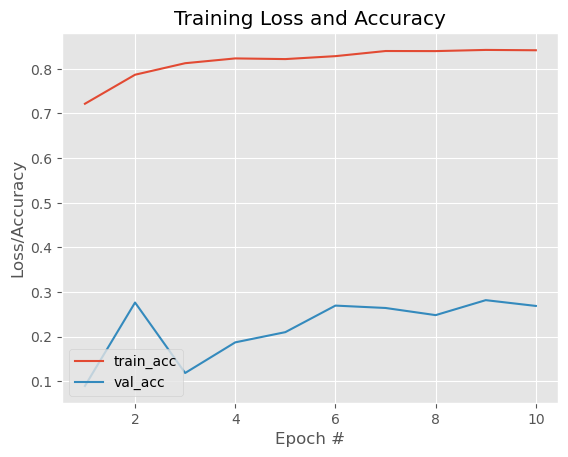

In [65]:
# plot the training loss and accuracy
N = epochs_num+1
plt.style.use("ggplot")
plt.figure()
#plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
#plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(1, N), history3.history["accuracy"], label="train_acc")
plt.plot(np.arange(1, N), history3.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig('evaluationVGG_multilabel_small_DataAugmentation.png')

In [47]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

# Load the image
img_path = '13592.webp'  # replace with your image path
img = image.load_img(img_path, target_size=(150, 150))

# Convert the image to a numpy array
x = image.img_to_array(img)

# Add a dimension to match the model's input shape
x = np.expand_dims(x, axis=0)

# Preprocess the image
x = preprocess_input(x)

# Use the model to make a prediction
predictions = model3.predict(x)

# Since this is a multi-label classification, each label will have a separate probability
# We can consider labels with probability > 0.5 as active
predicted_labels = np.where(predictions[0] > 0.5, 1, 0)

# Get the labels from the dataframe
labels = df.columns[1:]  # we skip the first column which is 'id'

# Create a dictionary mapping the labels to the predictions
label_predictions = dict(zip(labels, predicted_labels))

# Print the label predictions
for label, prediction in label_predictions.items():
    print(f"{label}: {prediction}")


1/1 [==============================] - 0s 17ms/step
glasses: 0
hand: 0
mask: 1
none: 0
other: 0
sunglasses: 0


In [66]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('model_VGG16.h5')

1/1 [==============================] - 0s 17ms/step


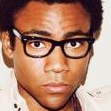

The model predicts this image is a: glasses


In [88]:
import os
from IPython.display import Image, display
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

# Load the image
img_path = 'i00128.png'
img = image.load_img(img_path, target_size=(150, 150))

# Preprocess the image
input_arr = image.img_to_array(img)
input_arr = np.array([input_arr])

# Make the prediction
predictions = loaded_model.predict(input_arr)

display(Image(filename=img_path))
        

# Decode the prediction
class_names = ['glasses', 'hand', 'mask', 'none', 'other', 'sunglasses']  # order of labels may vary based on your dataset, ensure the correct order
predicted_class = class_names[np.argmax(predictions)]
print("The model predicts this image is a:", predicted_class)


# helper

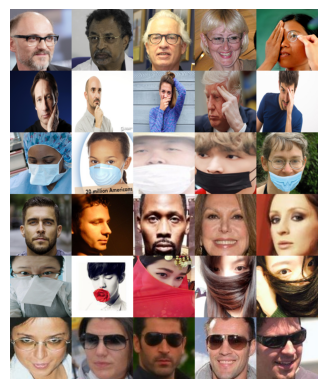

In [1]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

# Set the directory and classes
directory = 'dataset_2'
classes = ['glasses', 'hand', 'mask', 'none', 'other', 'sunglasses']

# Define the number of samples per class and the size of the output images
num_samples = 5
output_image_size = (150, 150)

# List to store images
images = []

for class_name in classes:
    class_dir = os.path.join(directory, class_name)
    class_files = os.listdir(class_dir)
    
    for file_name in class_files[:num_samples]:
        img_path = os.path.join(class_dir, file_name)
        img = Image.open(img_path)
        img = img.resize(output_image_size)
        images.append(img)

# Calculate the size of the collage
collage_width = num_samples * output_image_size[0]
collage_height = len(classes) * output_image_size[1]

# Create the collage image
collage = Image.new('RGB', (collage_width, collage_height))

# Arrange the images in a grid
for i, img in enumerate(images):
    x = (i % num_samples) * output_image_size[0]
    y = (i // num_samples) * output_image_size[1]
    collage.paste(img, (x, y))

# Display the collage
plt.imshow(np.asarray(collage))
plt.axis('off')
plt.show()

# Save the collage
collage.save('dataset_collage.jpg')


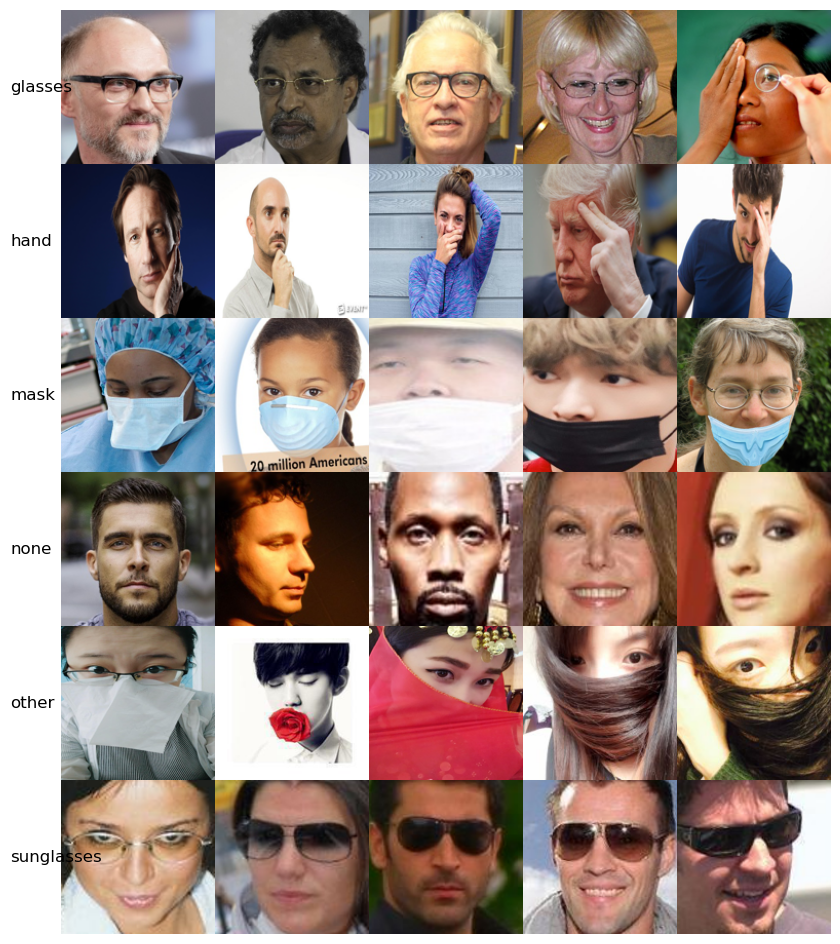

In [5]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

# Set the directory and classes
directory = 'dataset_2'
classes = ['glasses', 'hand', 'mask', 'none', 'other', 'sunglasses']

# Define the number of samples per class and the size of the output images
num_samples = 5
output_image_size = (150, 150)

# List to store images
images = []

for class_name in classes:
    class_dir = os.path.join(directory, class_name)
    class_files = os.listdir(class_dir)
    
    for file_name in class_files[:num_samples]:
        img_path = os.path.join(class_dir, file_name)
        img = Image.open(img_path)
        img = img.resize(output_image_size)
        images.append(img)

# Calculate the size of the collage
collage_width = num_samples * output_image_size[0]
collage_height = len(classes) * output_image_size[1]

# Create the collage image
collage = Image.new('RGB', (collage_width, collage_height))

# Arrange the images in a grid
for i, img in enumerate(images):
    x = (i % num_samples) * output_image_size[0]
    y = (i // num_samples) * output_image_size[1]
    collage.paste(img, (x, y))

# Convert collage to numpy array for plotting
collage_np = np.asarray(collage)

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(collage_np)
plt.axis('off')

# Adding class names
for i, class_name in enumerate(classes):
    y_position = i * output_image_size[1] + output_image_size[1]/2
    plt.text(-50, y_position, class_name, fontsize=12, verticalalignment='center')

plt.show()

# Save the collage
collage.save('dataset_collage.jpg')
